In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/20220302Full-tilt-quaternion.csv')

In [3]:
from pyquaternion import Quaternion
import vectormath as vmath

In [4]:
class MyQuaternion(Quaternion):
    @property
    def w(self):
        return self.q[0]
    @w.setter
    def w(self, value):
        self.q[0] = value
    @property
    def x(self):
        return self.q[1]
    @x.setter
    def x(self, value):
        self.q[1] = value
    @property
    def y(self):
        return self.q[2]
    @y.setter
    def y(self, value):
        self.q[2] = value
    @property
    def z(self):
        return self.q[3]
    @z.setter
    def z(self, value):
        self.q[3] = value

    def toEuler(self):
        # roll (x-axis rotation)
        sinr_cosp = 2 * (self.w * self.x + self.y * self.z)
        cosr_cosp = 1 - 2 * (self.x * self.x + self.y * self.y)
        roll = math.atan2(sinr_cosp, cosr_cosp)

        # pitch (y-axis rotation)
        sinp = 2 * (self.w * self.y - self.z * self.x)
        if (abs(sinp) >= 1):
            pitch = math.copysign(math.pi / 2, sinp) # use 90 degrees if out of range
        else:
            pitch = math.asin(sinp)

        # yaw (z-axis rotation)
        siny_cosp = 2 * (self.w * self.z + self.x * self.y)
        cosy_cosp = 1 - 2 * (self.y * self.y + self.z * self.z)
        yaw = math.atan2(siny_cosp, cosy_cosp)

        return (roll, pitch, yaw)

In [5]:
import math

In [6]:
pitch_angles = []
offset_angles = []
for i in range(len(df)):
    line = df.iloc[i]
    q = MyQuaternion(
        x=line['Diabolo-RX'],
        y=line['Diabolo-RY'],
        z=line['Diabolo-RZ'],
        w=line['Diabolo-RW'])

    direction_vector = vmath.Vector3(q.rotate([0,0,1]))
    horizontal_vector = vmath.Vector3(direction_vector[0], direction_vector[1], 0)
    horizontal_vector = horizontal_vector.normalize()

    pitch_angle = math.acos(direction_vector.dot(horizontal_vector))
    if (direction_vector[2]<=0):
        pitch_angle *= -1
    pitch_angles.append(pitch_angle)

    stick_right_vector = vmath.Vector3(
        line['stick_right-TX'],
        line['stick_right-TY'],
        line['stick_right-TZ']
    )
    stick_left_vector = vmath.Vector3(
        line['stick_left-TX'],
        line['stick_left-TY'],
        line['stick_left-TZ']
    )

    stick_diff_vector = stick_right_vector - stick_left_vector
    stick_diff_vector = vmath.Vector3(stick_diff_vector[0], stick_diff_vector[1], 0)
    stick_diff_vector = stick_diff_vector.normalize()

    offset_angle = math.pi/2 - math.acos(stick_diff_vector.dot(horizontal_vector))
    offset_angles.append(-offset_angle)
    

In [7]:
import matplotlib.pyplot as plt

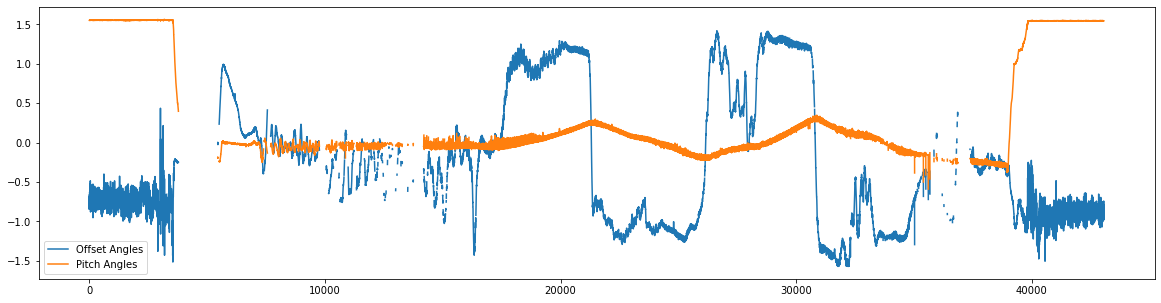

In [8]:
plt.figure(figsize=(20,5))
plt.plot(list(range(len(offset_angles))), offset_angles, label="Offset Angles")
plt.plot(list(range(len(pitch_angles))), pitch_angles, label="Pitch Angles")
plt.legend()

In [10]:
from scipy.signal import savgol_filter

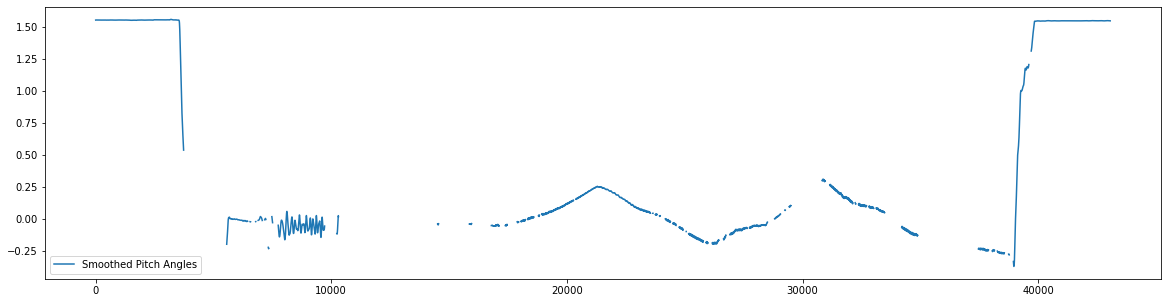

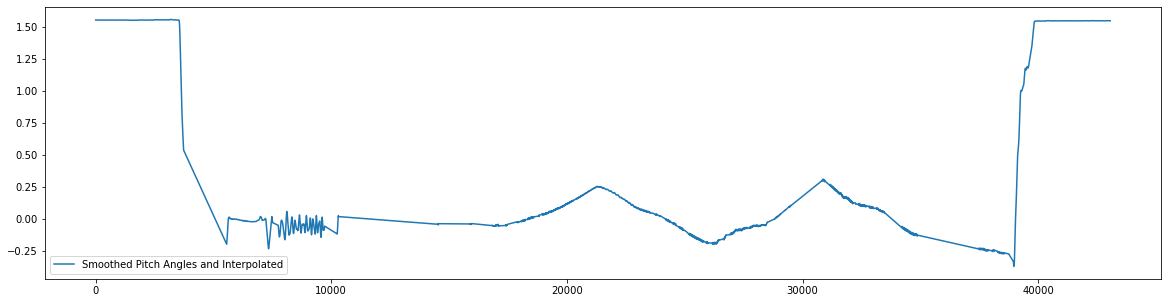

In [32]:
smoothed_pitch_angles = savgol_filter(pitch_angles, 101, 5)
plt.figure(figsize=(20,5))
plt.plot(list(range(len(smoothed_pitch_angles))), smoothed_pitch_angles, label="Smoothed Pitch Angles")
plt.legend()

x = smoothed_pitch_angles
xi = np.arange(len(x))
mask = np.isfinite(x)
xfiltered = np.interp(xi, xi[mask], x[mask])
plt.figure(figsize=(20,5))
plt.plot(list(range(len(xfiltered))), xfiltered, label="Smoothed Pitch Angles and Interpolated")
plt.legend()

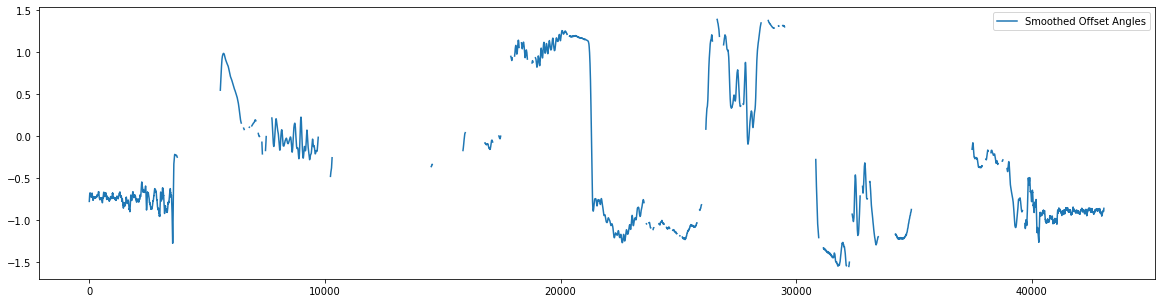

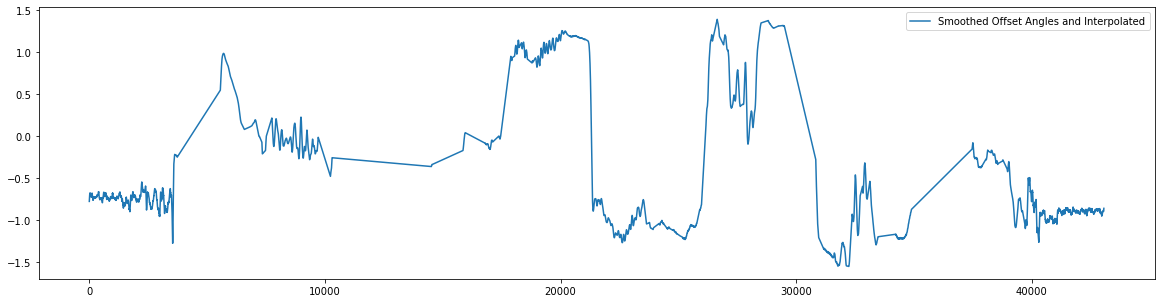

In [36]:
smoothed_offset_angles = savgol_filter(offset_angles, 101, 5)
plt.figure(figsize=(20,5))
plt.plot(list(range(len(smoothed_offset_angles))), smoothed_offset_angles, label="Smoothed Offset Angles")
plt.legend()

x = smoothed_offset_angles
xi = np.arange(len(x))
mask = np.isfinite(x)
xfiltered = np.interp(xi, xi[mask], x[mask])
plt.figure(figsize=(20,5))
plt.plot(list(range(len(xfiltered))), xfiltered, label="Smoothed Offset Angles and Interpolated")
plt.legend()

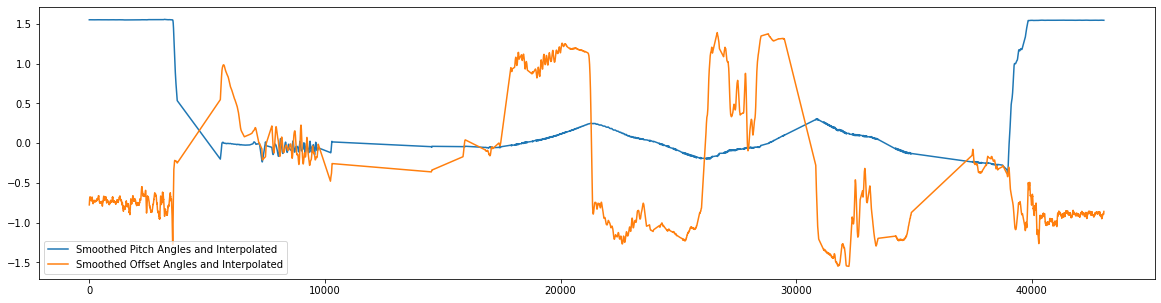

In [39]:
%matplotlib inline

x = smoothed_pitch_angles
xi = np.arange(len(x))
mask = np.isfinite(x)
xfiltered = np.interp(xi, xi[mask], x[mask])
plt.figure(figsize=(20,5))
plt.plot(list(range(len(xfiltered))), xfiltered, label="Smoothed Pitch Angles and Interpolated")

x = smoothed_offset_angles
xi = np.arange(len(x))
mask = np.isfinite(x)
xfiltered = np.interp(xi, xi[mask], x[mask])
plt.plot(list(range(len(xfiltered))), xfiltered, label="Smoothed Offset Angles and Interpolated")

plt.legend()

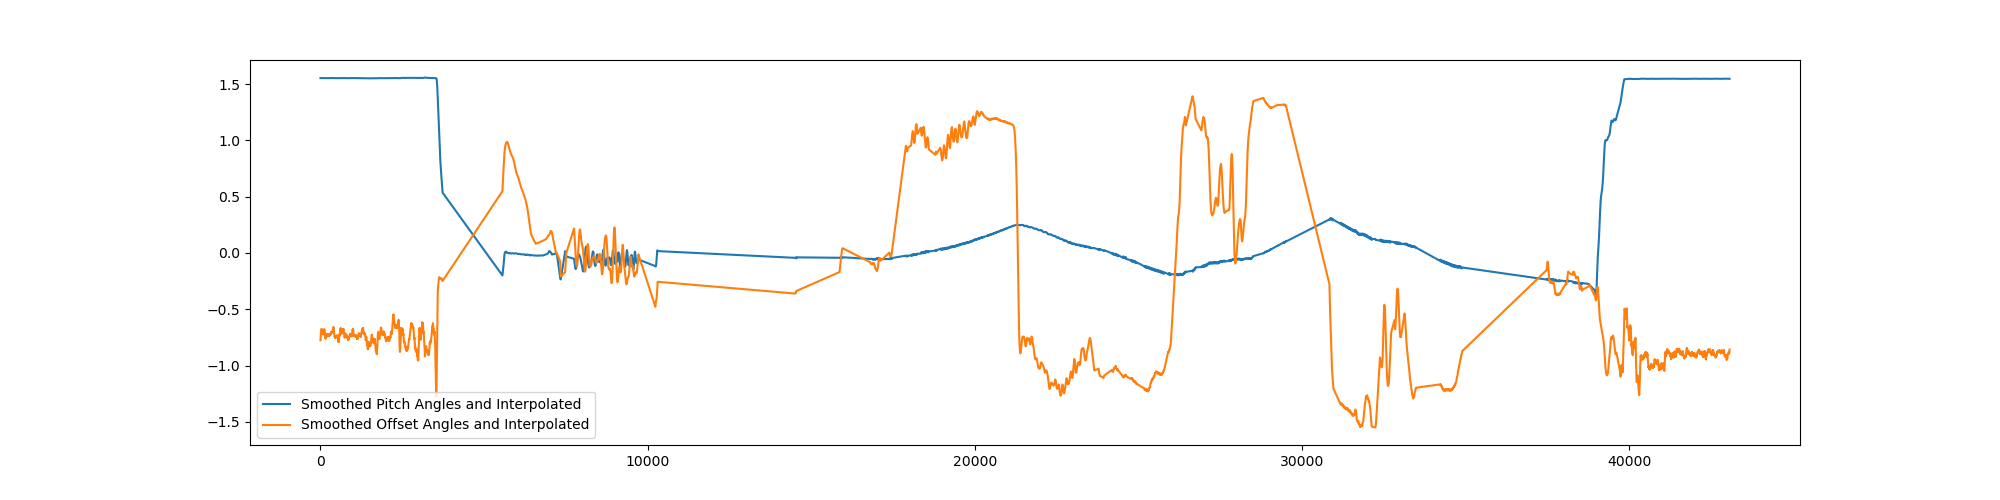

In [38]:
%matplotlib widget

x = smoothed_pitch_angles
xi = np.arange(len(x))
mask = np.isfinite(x)
xfiltered = np.interp(xi, xi[mask], x[mask])
plt.figure(figsize=(20,5))
plt.plot(list(range(len(xfiltered))), xfiltered, label="Smoothed Pitch Angles and Interpolated")

x = smoothed_offset_angles
xi = np.arange(len(x))
mask = np.isfinite(x)
xfiltered = np.interp(xi, xi[mask], x[mask])
plt.plot(list(range(len(xfiltered))), xfiltered, label="Smoothed Offset Angles and Interpolated")

plt.legend()